# Описание данных

Произведем импорт файла и первоначальное исследование.

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('./UCI_Credit_Card.csv')

FileNotFoundError: File b'./UCI_Credit_Card.csv' does not exist

In [2]:
df.head()

NameError: name 'df' is not defined

ID: ID клиента <br>
LIMIT_BAL: Сумма кредитного лимита <br>
SEX: Пол (1=М, 2=Ж) <br>
EDUCATION: (1=Среднее, 2=ПТУ, 3=Высшее, 4=Другое, 5, 6=Неизвестно) <br>
MARRIAGE: Семейное положение (1=Женат/Замужем, 2=Холост, 3=Другое) <br>
AGE: Возраст, лет <br>
PAY_0: Наличие просрочки in September, 2005 (-1=платеж во время, 1=просрочка один месяц, ... 9=просрочка девять месяцев и далее) <br>
...
<br>
PAY_6: Наличие просрочки in April, 2005 (scale same as above) <br>
BILL_AMT1: Сумма остатка на счете in September, 2005 (NT dollar) <br>
...
<br>
BILL_AMT6: Сумма остатка на счете in April, 2005 (NT dollar) <br>
PAY_AMT1: Сумма предыдущего платежа in September, 2005 (NT dollar) <br>
...
<br>
PAY_AMT6: Сумма предыдущего платежа in April, 2005 (NT dollar) <br>
**dflt: Целевая метрика - просроченный платеж (1=yes, 0=no)** <br>

In [3]:
df.describe()

NameError: name 'df' is not defined

Видим, что в нашей выборке 30 тыс. строк. Средняя сумма кредитного лимита - 167484 $. Средний возраст клиента - 35 лет. Судя по параметру "Пол" несколько больше клиентов женского пола. Образование в основном ближе к среднему специальному. **По целевой метрике - количество дефолтов по отношению ко всему объему данных - около 22%, т.е. видна некоторая "перекошенность" классов, что, впрочем, для задач классификации является частым явлением.**


In [4]:
df[df['dflt'] == 1].head()

NameError: name 'df' is not defined

Отфильтруем данные по целевому показателю - dflt и визуально сравним первые пять строк каждой из выборок

In [5]:
df[df['dflt'] == 0].head()

NameError: name 'df' is not defined

Уже из случайной выборки, посмотрев на фичи можно сказать, что видна **корреляция целевого признака с показателем просроченности платежей за предыдущие месяцы (PAY_N).** Клиенты, у которых нет дефолта - либо не пользовались картой в предыдущих месяцах (0), либо платили вовремя (-1). Клиенты с дефолтом практически все допускали просрочку 1-2 месяца. Также можно отметить еще корреляцию с возрастом. Просрочники - более молодые - в основном, до 30.Платящие в срок - почти все старше 30.

# Визуальный анализ данных

Произведем визуализацию полученных выше предположений про возраст и число просроченных платежей в предыдущих месяцах.

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [7]:
# Заменим значения в колонке dflt на True/False
# Предварительно скопируем наш датафрейм в другой, чтобы добавлять различные столбцы и трансформировать без влияния на исходную выборку
d = {0 : False, 1 : True}
va = df.copy();
va['dflt'] = va['dflt'].map(d)

NameError: name 'df' is not defined

In [8]:
d = {False : 'До 30', True : '30 и старше'}
va['older_30'] = (va['AGE'] >= 30).astype('bool').map(d)
pd.crosstab(va['dflt'], va['older_30'], margins=True)

NameError: name 'va' is not defined

In [9]:
sns.countplot(x='older_30', hue='dflt', data=va);
ax = plt.axes();
ax.set_title('Доля просрочников в зависимости от возраста',fontweight="bold", size=12);

NameError: name 'va' is not defined

Исходя из построенного графика и кросс-таблице не видно какой то корреляции дефолта с возрастом. Более того, можно сказать, что доля просрочников в рамках рассматриваемых возрастных порогов примерно одинакова - 28-29%.
Проведем подобное исследование для другой метрики - наличие просроченных платежей в предыдущие периоды.
Для упрощения дальнейшего анализа преобразуем значения в полях PAY_N - -1 изменим в 0, все что больше 0 - в 1.

In [10]:
d = {-2: 0,-1: 0,0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
va['dflt_past'] = va['PAY_0'].map(d) + va['PAY_2'].map(d) + va['PAY_3'].map(d) + va['PAY_4'].map(d) + va['PAY_5'].map(d) + va['PAY_6'].map(d)
d = {False : 'Без просрочек', True : 'Были просрочки'}
va['dflt_past'] = (va['dflt_past'] > 0).astype('bool').map(d)

pd.crosstab(va['dflt'], va['dflt_past'], margins=True)

NameError: name 'va' is not defined

In [11]:
sns.countplot(x='dflt_past', hue='dflt', data=va);
ax = plt.axes();
ax.set_title('Доля просрочников в зависимости от статуса предыдущих платежей',fontweight="bold", size=12);

NameError: name 'va' is not defined

Здесь видно, что доля просрочников среди платящих в срок значительно меньше, чем среди тех, кто выходил в просрочку в предыдущие периоды. Таким образом можно сказать, что, исходя из визуальной оценки, данный параметр **значительно влияет на целевую метрику**.

Посмотрим корреляцию других показателей друг относительно друга, построив и раскрасив матрицу корреляции.

NameError: name 'df' is not defined

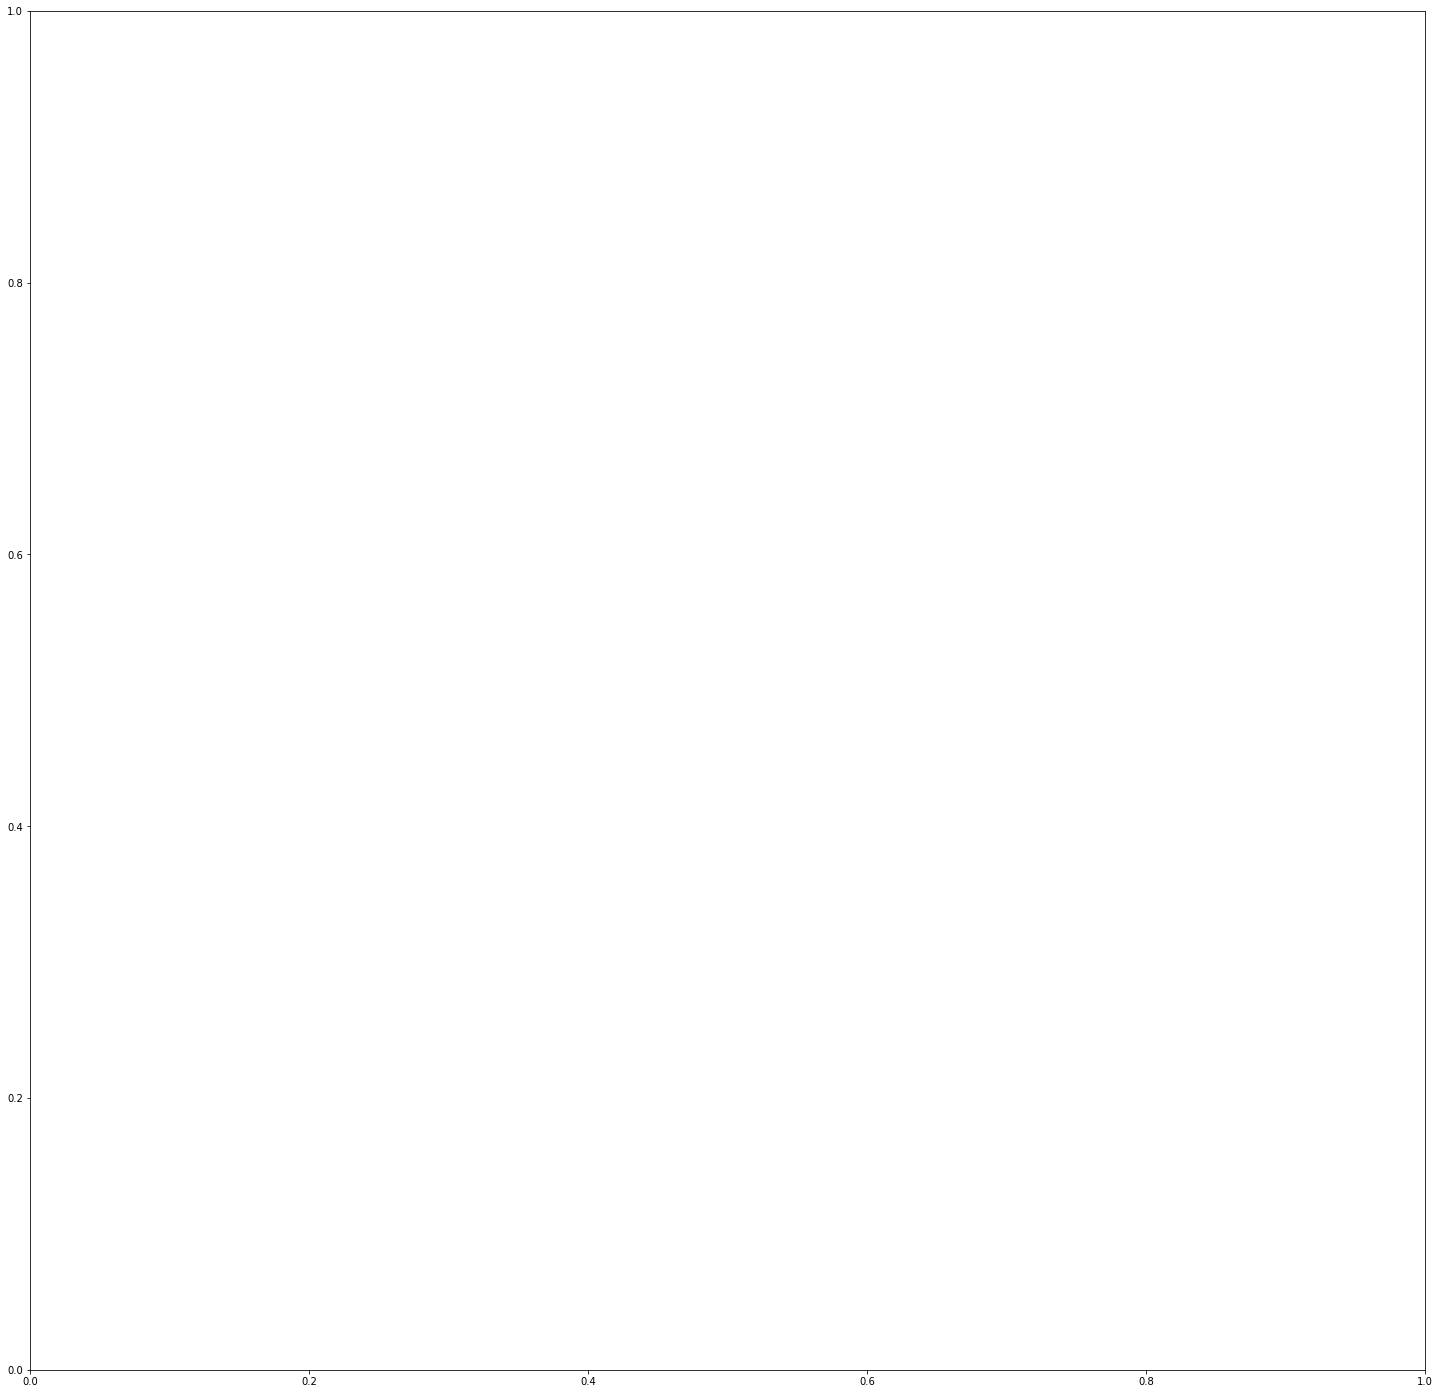

In [12]:
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = df.drop(['ID'], axis=1).corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Матрица корреляции признаков',fontweight="bold", size=30)
plt.show()

Матрица подтверждает выдвинутое ранее предположение - на целевой показатель ощутимо влияет только показатель PAY_0..6, все остальные - слабо связаны с ним.

# Выбор метрики сравнения моделей

Исходную выборку разобьем на две подвыборки - обучающую (train) и отложенную (hold) в соотношении 70% - 30%. Для повышения качества подбора и сравнения гиперпараметров моделей и самих моделей между собой будем использовать на обучающей выборке кросс-валидацию, т.к. объем данных не очень большой и время работы будет приемлемым.

Метрики, которые будут использоваться для сравнения моделей: <br>
**accuracy** - точность "попадания" - доля правильно предсказанных ответов целевой метрики <br>
Поскольку классы у нас несбалансированы - доля просрочников меньше, кроме того есть явное требование к модели - ошибка типа "False Negative" хуже, чем "False Positive" (лучше некорректно отнести хорошего клиента к просрочникам и дополнительно его проинформировать, чем не выявить потенциального просрочника), также будем использовать: <br>
**confuzion_matrix** - матрица ошибок <br>
**precision** - точность, 
**recall** - полнота <br>
**AUC-ROC** - коэффициент, вид кривой

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Деревья решений

Одним из популярных методов решения задачи классификации является построения дерева решений, с него и начнем.

**Принцип работы дерева решений**
В наиболее простом виде это способ представления правил в иерархической, последовательной структуре. Основа такой структуры - ответы "Да" или "Нет" на ряд вопросов. Ветви (ребра графа) хранят в себе значения атрибутов, от которых зависит целевая функция, на листьях же записывается значение целевой функции. Существуют также и другие узлы - родительские и потомки - по которым происходит разветвление, и можно различить случаи.
Основной плюс - хорошая интерпретируемость

Для обучения в библиотеке sklearn.tree используется класс DecisionTreeClassifier. 
<br>Основные параметры: 
    - max_depth - максимальная глубина дерева
    - max_features - максимальное число признаков, по которым ищется лучшее разбиение в дереве
    - min_samples_leaf - минимальное число объектов в листе

Зададим x - совокупность фичей, y - целевая метрика

In [14]:
# Выделяем матрицу с целевой метрикой
y = df ['dflt']
# Убираем из исходной матрицы поле с целевой метрикой
x = df.drop('dflt', axis = 1)

NameError: name 'df' is not defined

In [15]:
# Делим на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state = 17); # seed генератора случайных сил

NameError: name 'x' is not defined

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf_tree = DecisionTreeClassifier() # Для начала выполним с дефолтными параметрами
cvs = cross_val_score(clf_tree, x_train, y_train, cv=5) # Рассчитываем результат для кроссс-валидации

NameError: name 'x_train' is not defined

In [18]:
np.mean(cvs)

NameError: name 'cvs' is not defined

На кросс-валидации доля верных ответов составляет 72%. При этом настроек не проводилось. Проведем подбор гиперпараметров.

**Подбираем max_depth, max_features для дерева**

In [19]:
tree_params = {'max_depth': np.arange(1,16), 'max_features' : [0.5, 0.7, 1]} # будем перебирать этот гиперпараметр в указанном диапазоне
tree_grid = GridSearchCV(clf_tree, tree_params, cv=5, n_jobs=-1) # параллелим на все ядра

In [20]:
%%time
tree_grid.fit(x_train, y_train) # Обучаем модель

NameError: name 'x_train' is not defined

In [21]:
tree_grid.best_score_,tree_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [22]:
tree_grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

С учетом оптимизации показатели улучшились, наиболее оптимальная длина дерева **max_depth = 3, max_features = 0.5**. При этом точность - **82%**.
Сделаем прогноз для отложенной выборки, начальную оценку проведем с помощью выбранной метрики accuracy

In [23]:
tree_valid_pred = tree_grid.predict(x_valid)

NameError: name 'x_valid' is not defined

**Вывод:** для новых данных наша модель на основе дерева решения будет правильно прогнозировать в **82% случаев**.
Экспортируем наше дерево для визуального просмотра. Ожидаемо, дерево построилось на метрике, которую мы выявили еще на этапе визуального анализа - **просроченные платежи за предыдущие периоды**. Здесь модель выбрала показатели PAY_0, PAY_2, PAY_3.

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(tree_grid.best_estimator_, out_file = "tree_dflt.dot", feature_names=x.columns, filled=True)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

<img src="files/tree_dflt.png">

# Метод ближайших соседей

**Описание метода:** <br>
На уровне интуиции: посмотри на соседей, какие преобладают, таков и ты. <br>
Формально: основой является гипотеза компактности (для классификации) - если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных. <br>
Основной плюс - хорошая интерпретируемость<br>

При использовании в задачах классификации объект присваивается тому классу, который является наиболее распространенным среди k соседей данного элемента, классы которых уже известны. <br>

Для обучения модели в библиотеке sklearn.neighbors используется класс KNeighborsClassifier<br>
Основные гиперпараметры: <br>
    **n_neighbors** - k - кол-во соседних элементов, которые будем учитывать <br>
    **weights** - uniform (все веса равны), distance (вес обратно пропорционален расстоянию до тестового примера) <br>
    **metric** - метрика для расчета расстояния (степени похожести) <br>
    
По умолчанию для расчета расстояния используется метрика аналогичная Еквлидовому расстоянию, которое выражается формулой: <br>
<center>$d=\sqrt{(x_B-x_A)^2+(y_B-y_A)^2}$</center>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
cls_knn = KNeighborsClassifier()
np.mean(cross_val_score(cls_knn, x_train, y_train, cv=5) )

NameError: name 'x_train' is not defined

In [26]:
knn_params = {'n_neighbors': list(range(50, 100, 10))} # будем перебирать этот гиперпараметр в указанном диапазоне
knn_grid = GridSearchCV(cls_knn, knn_params, cv=5, n_jobs=-1) # параллелим на все ядра

In [27]:
%%time
knn_grid.fit(x_train, y_train) # Обучаем модель

NameError: name 'x_train' is not defined

In [28]:
knn_grid.best_score_,knn_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [29]:
knn_grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [30]:
knn_valid_pred = knn_grid.predict(x_valid)

NameError: name 'x_valid' is not defined

**Вывод:** При поиске в довольно большом диапазоне возможных значений k получили, что наилучшую точность модель выдает на k=70, однако даже в этом случае точность модели оказывается ниже дерева решений - **всего 78%**. В связи с этим, дальнейшая "подстройка" гиперпараметра с большой вероятностью ничего не даст, поэтому изучение модели прекращаем.

# Логистическая регрессия

**Описание метода** <br>
Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (или гиперплоскостью) на две соответствующие классам области. Эта граница задается в зависимости от имеющихся исходных данных и обучающего алгоритма. Чтобы все работало, точки исходных данных должны разделяться линейной границей на две области. Если точки исходных данных удовлетворяют этому требованию, то их можно назвать линейно разделяемыми.
Основной гиперпараметр:
    **с - коэффициент регуляризации**. Влияет на сложность модели - чем он выше, тем меньше сложность

In [31]:
from sklearn.linear_model import LogisticRegression
LogisticRegression?

In [32]:
logit = LogisticRegression(random_state=17)
np.mean(cross_val_score(logit, x_train, y_train.values.ravel(), cv=5))

NameError: name 'x_train' is not defined

In [33]:
logit_params = {'C': [0.000001, 0.00001, 0.0001, 0.001 ,0.01, 0.1, 1.0, 10, 100]} # будем перебирать этот гиперпараметр в указанном диапазоне
logit_grid = GridSearchCV(logit, logit_params, cv=5, n_jobs=-1) # параллелим на все ядра

In [34]:
%%time
logit_grid.fit(x_train, y_train) # Обучаем модель

NameError: name 'x_train' is not defined

In [35]:
logit_grid.best_score_,logit_grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [36]:
logit_grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [37]:
logit_valid_pred = logit_grid.predict(x_valid)

NameError: name 'x_valid' is not defined

**Вывод:** Результат для метрики accuracy такой же, как и по методу kNN - 78%. Кроме этого, подбор гиперпараметров показал, что коэфициент регуляризации (С) стремится к наименьшему значению, что говорит о стремлении модели к максимальному усложнению.

# Случайный лес

**Описание метода** <br>
Метод относится к группе методов, представляющих собой ансамбли моделей. <br>
Исходная выборка методом бутстрэпа разбивается на N подвыборок, для каждой подвыборки строится решающее дерево. <br>
Параметры: <br>
**n_estimators** - число деревьев. Чем больше деревьев, тем лучше качество, но время настройки и работы RF также пропорционально увеличивается. Часто при увеличении n_estimators качество на обучающей выборке повышается, а качество на тесте выходит на ассимптоту. <br>
**max_features** - число признаков для выбора расщепления. При увеличении параметра увеличивается время построения леса, а деревья становятся более однообразными. <br>
**min_samples_split** - минимальное число объектов, при котором выполняется расщепление. <br>
**max_depth** - максимальная глубина деревьев. Чем меньше глубина, тем быстрее строится и работает RF. При увеличении глубины резко возрастает качество на обучении, но и на контроле оно, как правило, увеличивается. Рекомендуется использовать максимальную глубину.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=-1)
rf.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [39]:
rf_valid_pred = rf.predict(x_valid)

NameError: name 'x_valid' is not defined

# Вывод. Сравнение моделей по метрикам
## 1. Accuracy

In [40]:
tree_accuracy = accuracy_score(y_valid, tree_valid_pred)
knn_accuracy = accuracy_score(y_valid, knn_valid_pred)
logit_accuracy = accuracy_score(y_valid, logit_valid_pred)
rf_accuracy = accuracy_score(y_valid, rf_valid_pred)

print("tree_accuracy = " + str(tree_accuracy))
print("knn_accuracy = " + str(knn_accuracy))
print("logit_accuracy = " + str(logit_accuracy))
print("rf_accuracy = " + str(rf_accuracy))

NameError: name 'y_valid' is not defined

**Вывод:** **дерево решений и случайный лес дают примерно одинаковую наилучшую оценку accuracy ~ 82%**. Метод ближайших соседей и логистическая регрессия - также дают неплохую, но более низкую ~ 78%. <br>
Причина по которой DT и RF дают одинаковую оценку вероятнее всего в том, что не так много признаков, которые действительно коррелируют с целевой метрикой, а именно - это только признаки PAY_0..6. В частности, поэтому увеличение глубины дерева также не давало какого либо эффекта, эстиматор выбрал оптимальную глубину max_depth = 2.

## 2. Confuzion_matrix (матрица ошибок)

In [41]:
tree_conf_matrix = confusion_matrix(y_valid, tree_valid_pred);
knn_conf_matrix = confusion_matrix(y_valid, knn_valid_pred);
logit_conf_matrix = confusion_matrix(y_valid, logit_valid_pred);
rf_conf_matrix = confusion_matrix(y_valid, rf_valid_pred);

hm = sns.heatmap(tree_conf_matrix, annot=True); 
plt.title('Decision tree');

NameError: name 'y_valid' is not defined

In [42]:
sns.heatmap(knn_conf_matrix,  annot=True);
plt.title('kNN');

NameError: name 'knn_conf_matrix' is not defined

In [43]:
sns.heatmap(logit_conf_matrix, annot=True);
plt.title('Logit');

NameError: name 'logit_conf_matrix' is not defined

In [44]:
sns.heatmap(rf_conf_matrix, annot=True);
plt.title('Random Forest');

NameError: name 'rf_conf_matrix' is not defined

**Вывод:** **дерево решений и лес дают наиболее адекватную**, хоть и далекую от идеальной матрицу ошибок. Для логистической регрессии видно, что ни одно из позитивных значений не было правильно предсказано. Т.е. можно сделать вывод, что **для нашей задачи логистическая регрессия не работает совсем**.

## 3. Precision, recall (точность, полнота)

In [45]:
print("tree_classification_report");
print(classification_report(y_valid, tree_valid_pred));
print("knn_classification_report");
print(classification_report(y_valid, knn_valid_pred));
print("logit_classification_report");
print(classification_report(y_valid, logit_valid_pred));
print("rf_classification_report");
print(classification_report(y_valid, rf_valid_pred));

tree_classification_report


NameError: name 'y_valid' is not defined

**Вывод:** дерево решений и лес дают адекватное значение точности (precision): 0.64 (RF), 0.69 (DT). Однако полнота (recall) низкая - 0.38 и 0.34 соответственно, что говорит о том, что 62% просрочников алгоритм не распознал, что довольно плохо.
Поскольку у нас есть важная вводная - ошибка типа "False Negative" хуже, чем "False Positive", то нам больше важна полнота, чем точность, поэтому в данной метрике **лучшим является случайный лес**.

## 4. ROC-кривая

In [46]:
print("tree_roc_auc_score = " + str(roc_auc_score(y_valid, tree_valid_pred)));
print("knn_roc_auc_score = " + str(roc_auc_score(y_valid, knn_valid_pred)));
print("logit_roc_auc_score = " + str(roc_auc_score(y_valid, logit_valid_pred)));
print("rf_roc_auc_score = " + str(roc_auc_score(y_valid, rf_valid_pred)));

NameError: name 'y_valid' is not defined

In [47]:
y_tree_proba = tree_grid.predict_proba(x_valid)
y_rf_proba = rf.predict_proba(x_valid)
y_knn_proba = knn_grid.predict_proba(x_valid)
y_logit_proba = logit_grid.predict_proba(x_valid)
fpr_tree, tpr_tree, tresholds_tree = roc_curve(y_valid,y_tree_proba[:,1])
fpr_rf, tpr_rf, tresholds_rf = roc_curve(y_valid,y_rf_proba[:,1])
fpr_knn, tpr_knn, tresholds_knn = roc_curve(y_valid,y_knn_proba[:,1])
fpr_logit, tpr_logit, tresholds_logit = roc_curve(y_valid,y_logit_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr_knn, tpr_knn, label = 'kNN')
plt.plot(fpr_tree, tpr_tree, label = 'Decision tree')
plt.plot(fpr_rf, tpr_rf, label = 'Random forest')
plt.plot(fpr_logit, tpr_logit, label = 'Logit')
plt.legend();
plt.title('ROC-кривые');
plt.show()

NameError: name 'x_valid' is not defined

**Вывод:** **площадь под ROC кривой наибольшая у алгоритма RF (0.658)**, чуть меньше Desicion Tree (0.646). Это в общем то следует из того, что полнота для RF оказалась выше.

## 5. Вывод
В рамках работы был исследован набор данных по клиентам - владельцам кредитных карт, при этом целевой метрикой являлся выход клиента в просрочку в следующем месяце. 
Ввиду низкой коррелированности исходных признаков с целевым признаком показатели моделирования являются достаточно низкими (в основном из-за низкого значения recall для всех моделей), при этом наиболее оптимальными моделями оказались дерево решений и случайный лес - по метрикам они практически одинаковы, однако **случайный лес (RF) дает наибольшую полноту, поэтому для нашего случая он является оптимальным.** <br>
Удалось добиться следующих показателей: <br>
accuracy = 0.82 <br>
precision = 0.64 <br>
recall = 0.38 <br>
roc_auc_score = 0.68 <br>
Этот результат похож на результат (не хуже) других участников Kaggle (во всяком случае при беглом просмотре не удалось найти примеры, где accuracy > 82%).